In [1]:
# @formatter:off
%load_ext autoreload
%autoreload 2
# @formatter:on

In [2]:
import cv2 as cv2

In [3]:
# list(filter(lambda port: cv2.VideoCapture(port).isOpened(), range(10)))


In [7]:
from raspberryturk.core import opencv

cam = opencv.Camera(4,(1280,720))

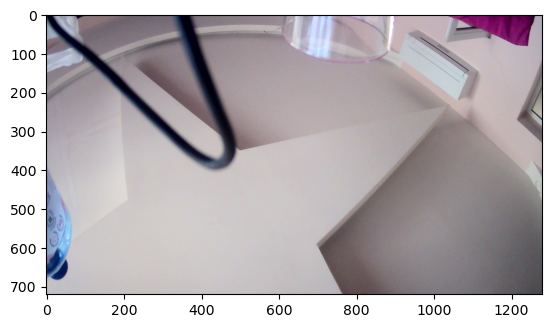

In [8]:
from matplotlib import pyplot as plt

frame = cam.frame
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# frame = frame[:,:,::-1]
plt.imshow(frame)

In [14]:
cam.__exit__()

In [8]:
import pandas as pd
url = "https://en.wikipedia.org/wiki/List_of_common_resolutions"
table = pd.read_html(url)[0]
table.columns = table.columns.droplevel()
cap = cv2.VideoCapture(4)
resolutions = {}
for index, row in table[["W", "H"]].iterrows():
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, row["W"])
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, row["H"])
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    resolutions[str(width)+"x"+str(height)] = "OK"
print(resolutions)


{'320.0x240.0': 'OK', '640.0x360.0': 'OK', '640.0x480.0': 'OK', '800.0x480.0': 'OK', '800.0x600.0': 'OK', '1280.0x720.0': 'OK'}


In [8]:
from raspberryturk.embedded.vision.chessboard_perspective_transform import recalibrate_camera_position

recalibrate_camera_position(4)

AssertionError: Couldn't find chessboard.